# Weighted graphs in `networkX`



In [ ]:
# First import packages

import networkx as nx
import matplotlib.pyplot as plt

The easiest way to create a weighted graph in `networkX`: 

- Create an empty graph
- Then add edges *with an extra parameter for weight*. 

For example let's recreate this graph: 

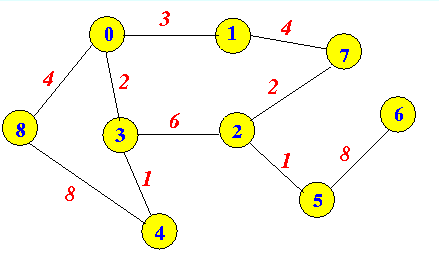

In [ ]:
G = nx.Graph()

# Create a WEIGHTED edge list by giving the endpoints and then the weight: 
edge_list = [(0,1,3), (1,7,4)]

# Now use this new command to add: 
G.add_weighted_edges_from(edge_list)

In [ ]:
# get_edge_data will tell you the weight on a single edge: 

G.get_edge_data(0,1)

In [ ]:
# Let's go ahead and add the rest: 
remaining_edges = [(0,8,4), (8,4,8), (0,3,2), (3,4,1), (2,3,6), 
                   (2,7,2), (2,5,1), (5,6,8) ]
G.add_weighted_edges_from(remaining_edges)

**Visualizing weighted graphs with the weights shown on the edges is unfortunately not simple.** The workflow for making this happen is: 

1. Define a variable `pos` that specifies the layout of the graph from a list of defaults. `pos = nx.spring_layout(G)` and `pos = nx.circular_layout(G)` are the two we will use the most often. 
2. Call `nx.draw()` on the graph with the name of the graph first, then `pos`, then any other parameters. This will create a plot of the graph *without* the edge labels, but it doesn't draw it yet. 
3. Define `labels = nx.get_edge_attributes(G, "weight")`. This strips the weights out of `G` and puts then into the variable `labels`. 
4. Now call `nx.draw_networkx_edge_labels(wg2, pos, edge_labels = labels)`. This creates a plot of *just the labels*, on top of the unlabelled graph you created in step 2. 
5. Finally call `plt.show()` (with no input). This will draw the figure consisting of the unlabelled graph with the edge labels superimposed on it. 





In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_color = "lime")
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
plt.show()

## Finding MSTs using `networkX`

The `networkX` function `minimum_spanning_tree` finds the MST of a weighted graph using Kruskal's algorithm. You can switch it to Prim's algorithm by adding `algorithm = "prim"`. 


In [ ]:
T = nx.minimum_spanning_tree(G)

# Adding data = True causes Python to print out the edge weights. 
# The list function is necessary to actually see the contents of the edge list. 

list(T.edges(data=True))

In [ ]:
T_prim = nx.minimum_spanning_tree(G, algorithm="prim")
list(T_prim.edges(data=True))

There's no built-in command to get the total weight of the MST, but a simple loop will do the trick: 

In [ ]:
edge_list = list(T.edges(data=True))

total_weight = 0
for i in range(len(edge_list)): 
  # Add on the weight of the i-th edge 
  total_weight += edge_list[i][2]['weight']

print(total_weight)
